# Episode 21. Time Series Forecasting with MLP


## Import Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.optimizers import Adam

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [89]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
from google.colab import files
uploaded = files.upload()

Saving RSXFSN.csv to RSXFSN (3).csv


In [90]:
# Store data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [91]:
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [92]:
# split train & test data
n_train = int(len(df) * 0.8)#counts 80% of the data to train
n_test = len(df) - n_train #counts remainder of the data to test
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]  #puts the actual data into the test/train split
print(len(train), len(test)) #prints the length of each

300 75


In [93]:
#time series function given by the code
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [94]:
n_steps = 16 #number of steps
n_features = 1 #number of features

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps) #use funtion convert to time series and populate training data
x_test, y_test = get_timeseries(test,n_steps) #use function conver to time series and populate test data
 
print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


## Modeling

In [95]:
# define model
model = Sequential() #deinfe model
model.add(Dense(50, activation='relu', input_dim=n_steps)) #add layers
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer=Adam(0.001)) #final model with adam optimzer and MSE as loss

In [96]:
#1d cnn implemnetation
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps,n_features)))#conv1d 
model2.add(Flatten()) #2d to 1d
model2.add(Dense(50, activation='relu',input_dim=n_steps)) #add layers
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer=Adam(0.001)) #final model with adam optimzer and MSE as loss


## Training

In [97]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False) #fit and train model
history2 = model2.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False) #fit and train model

Epoch 1/500
8/8 [==============================] - 1s 33ms/step - loss: 9.9800 - val_loss: 15.1256
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 8.3832 - val_loss: 12.9619
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 7.2461 - val_loss: 11.9895
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 7.1970 - val_loss: 11.1686
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 6.6808 - val_loss: 10.8626
Epoch 6/500
8/8 [==============================] - 0s 12ms/step - loss: 6.5072 - val_loss: 10.0602
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 5.9344 - val_loss: 9.8787
Epoch 8/500
8/8 [==============================] - 0s 10ms/step - loss: 5.9866 - val_loss: 9.2321
Epoch 9/500
8/8 [==============================] - 0s 12ms/step - loss: 5.5926 - val_loss: 9.0567
Epoch 10/500
8/8 [==============================] - 0s 13ms/step - loss: 5.6431 - val_loss: 8.7646
Epoch 11/500
8/

## Evaluation

In [98]:
y_pred = model.predict(x_test) #make predictions
y_pred2=model2.predict(x_test)#make predictions

2/2 [==============================] - 0s 6ms/step


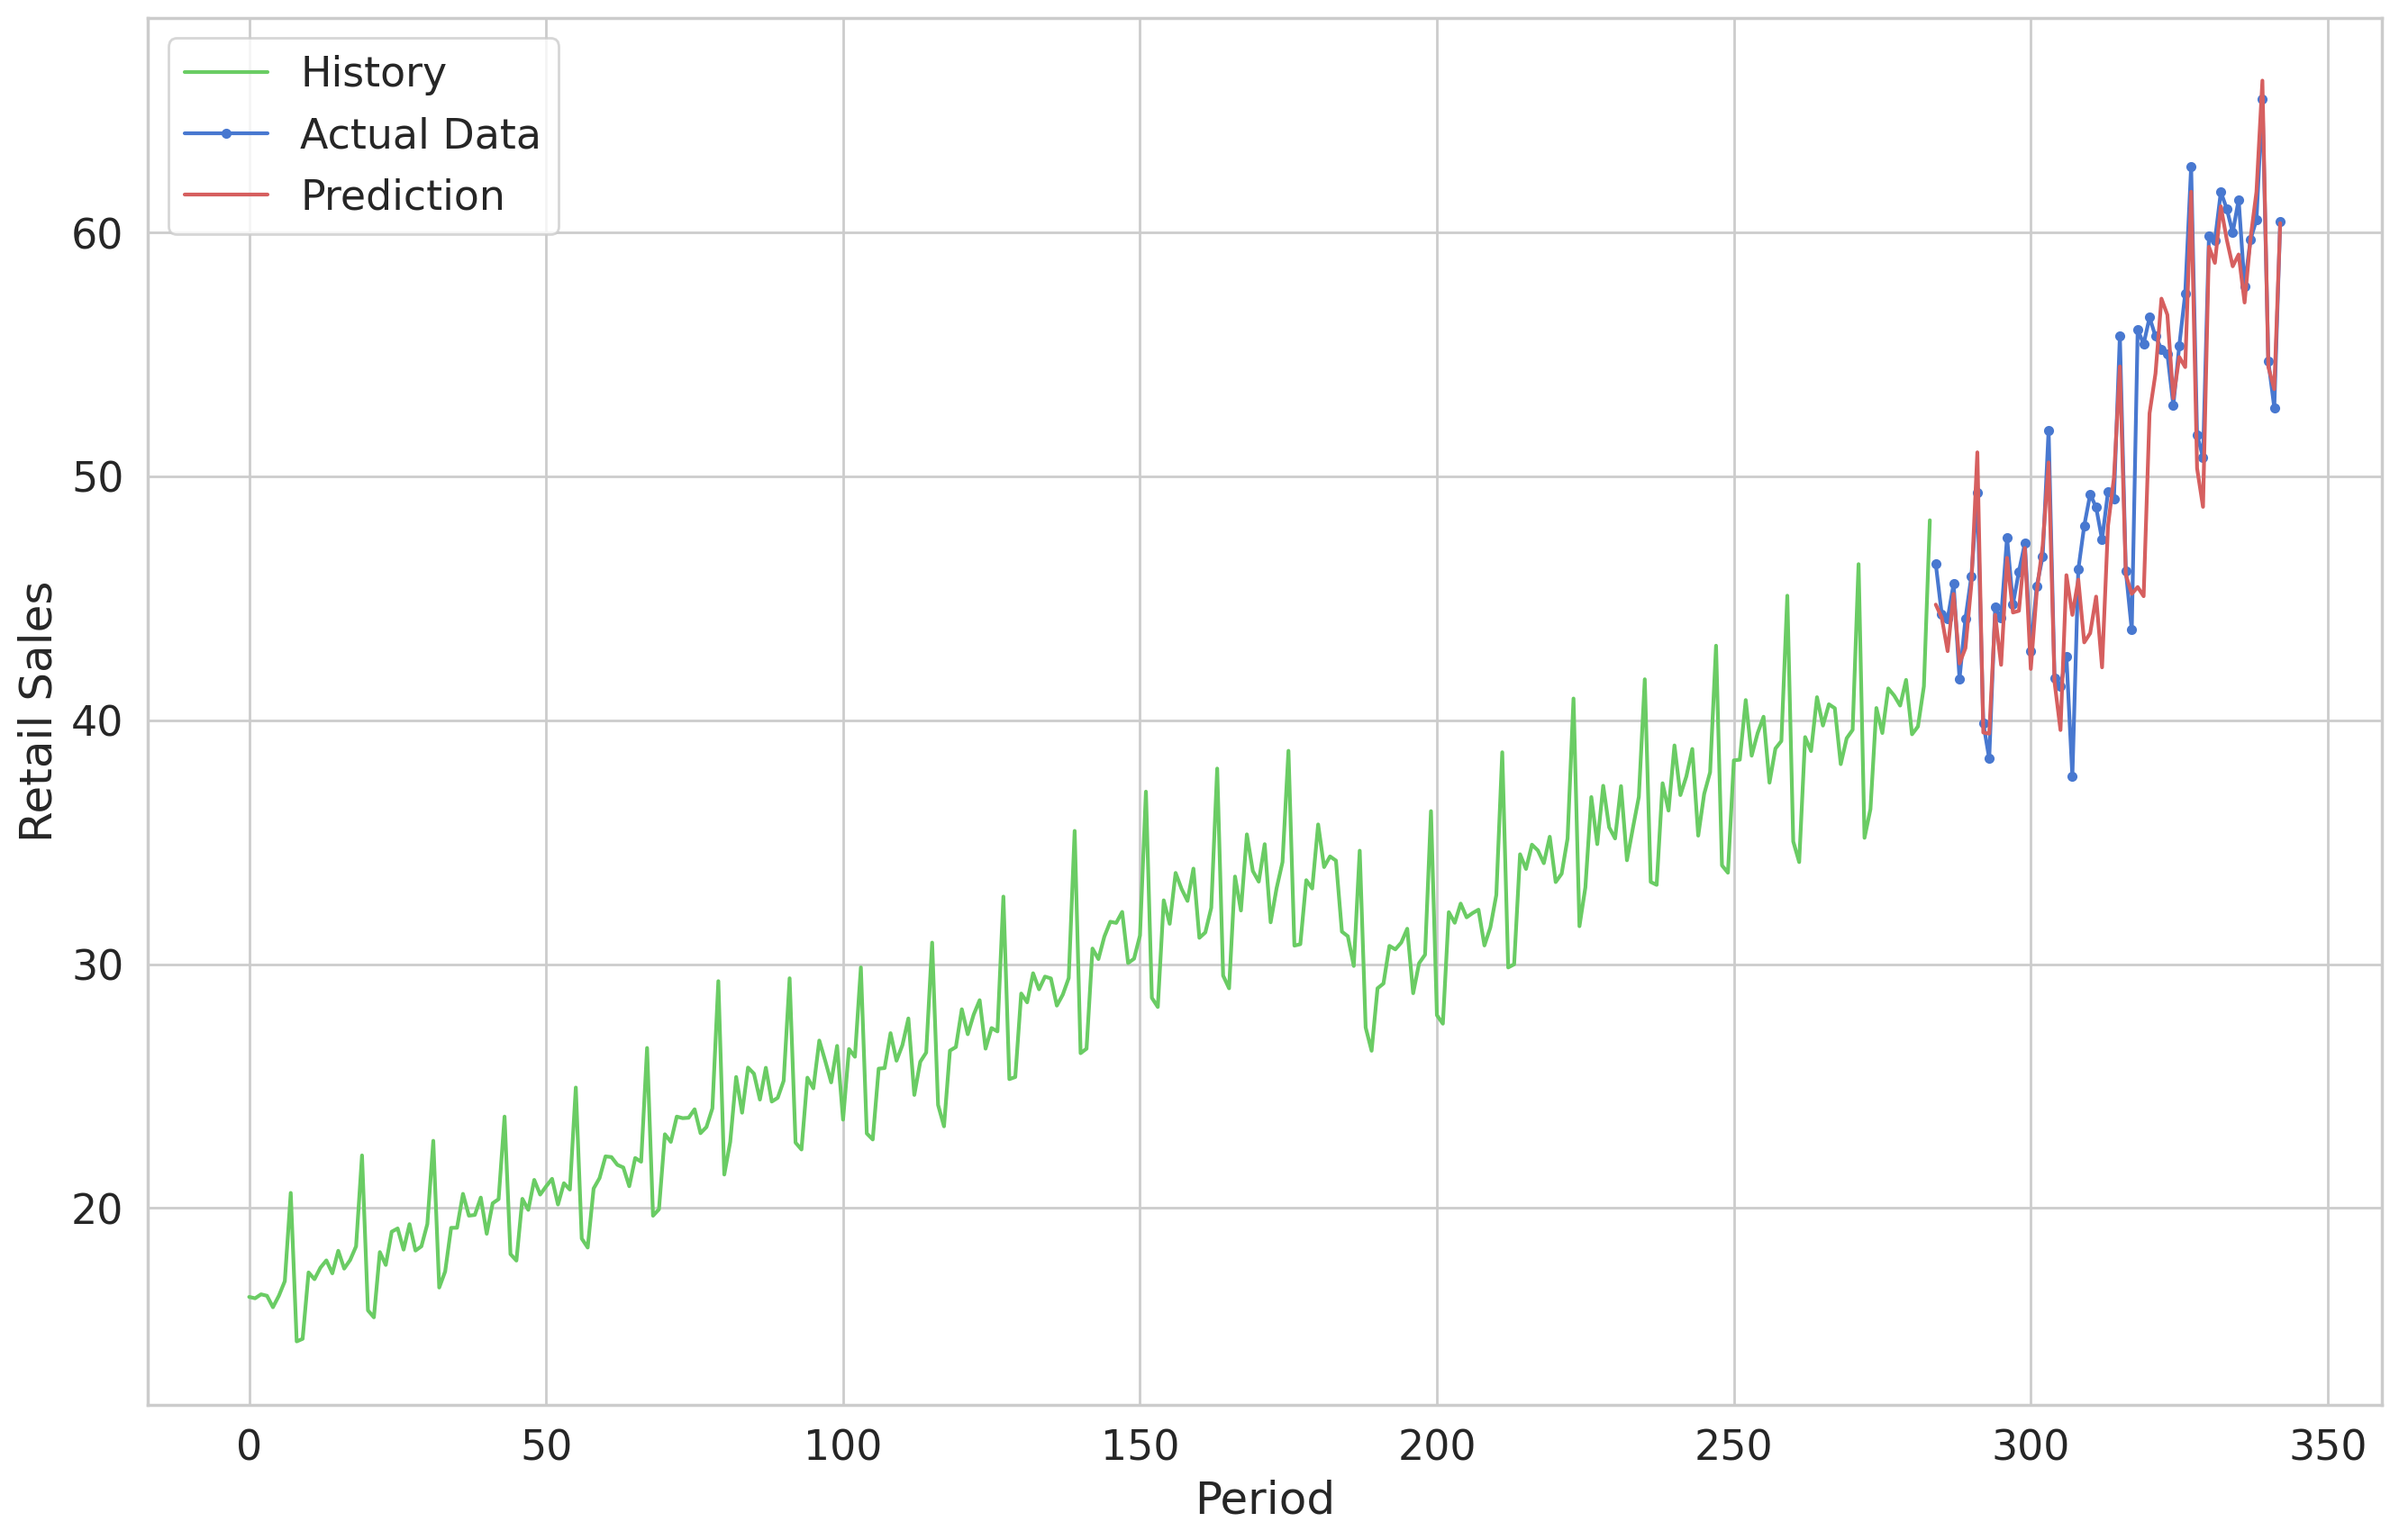

In [99]:
#plot model information
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

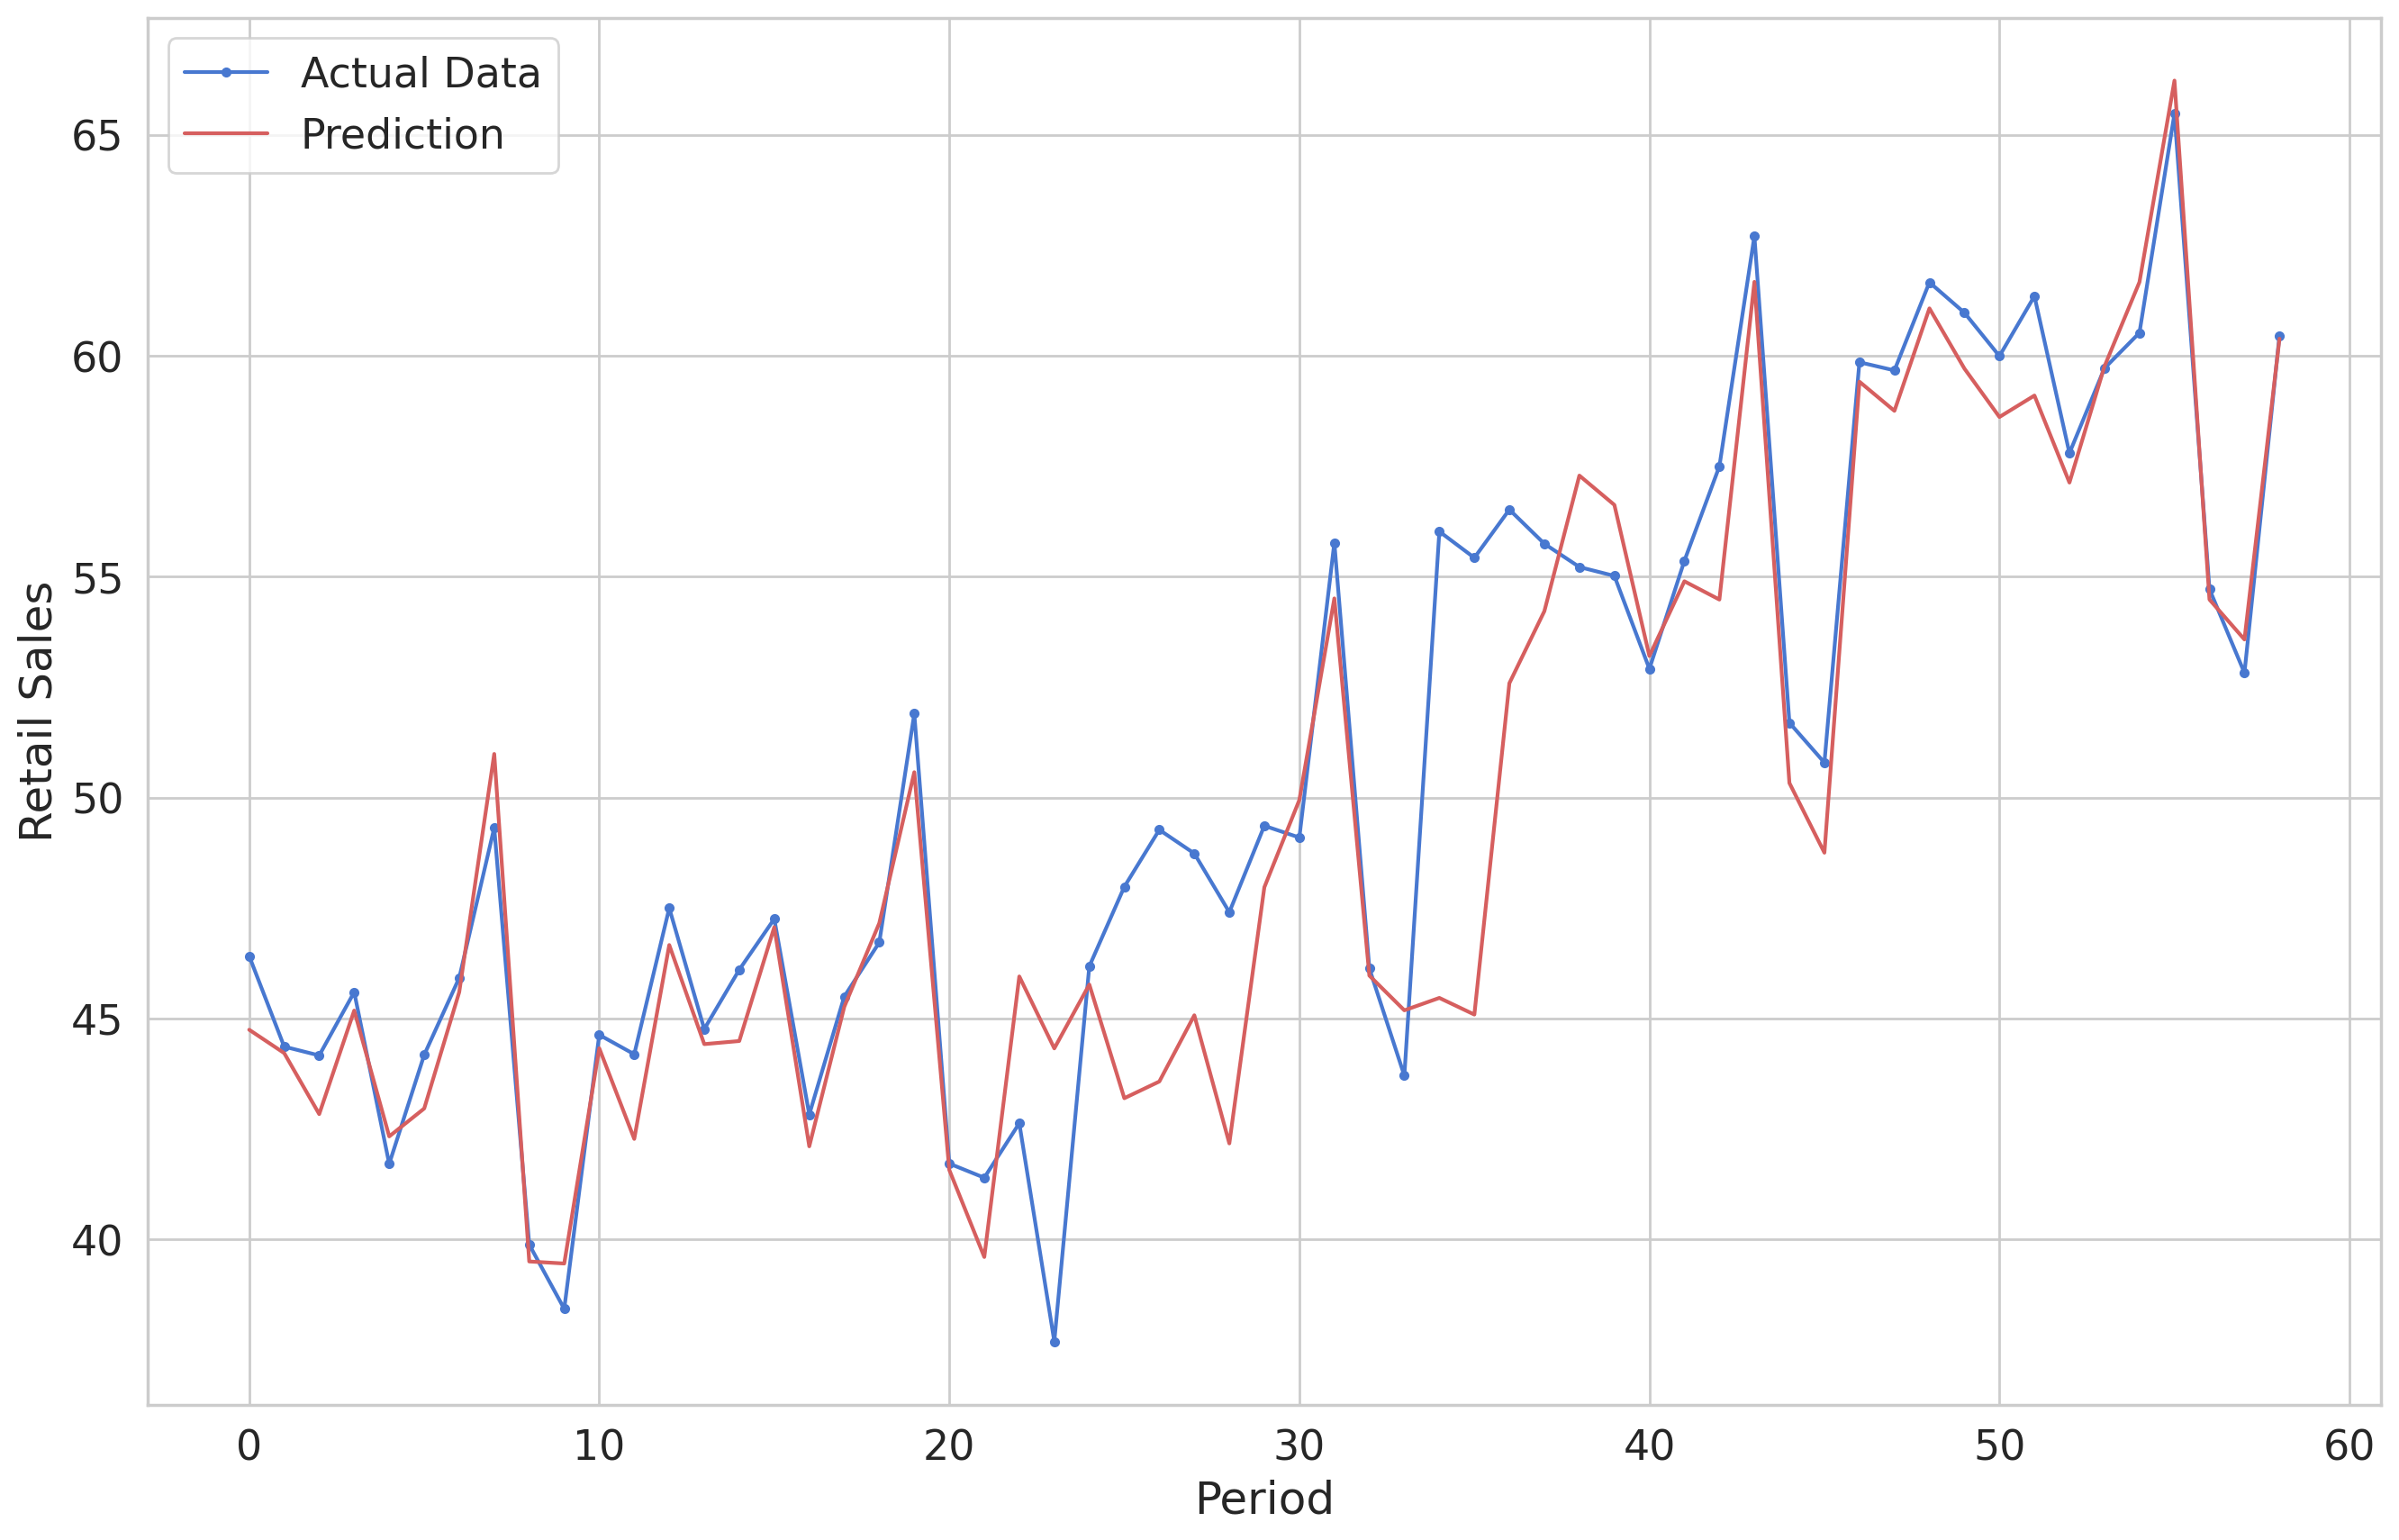

In [100]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

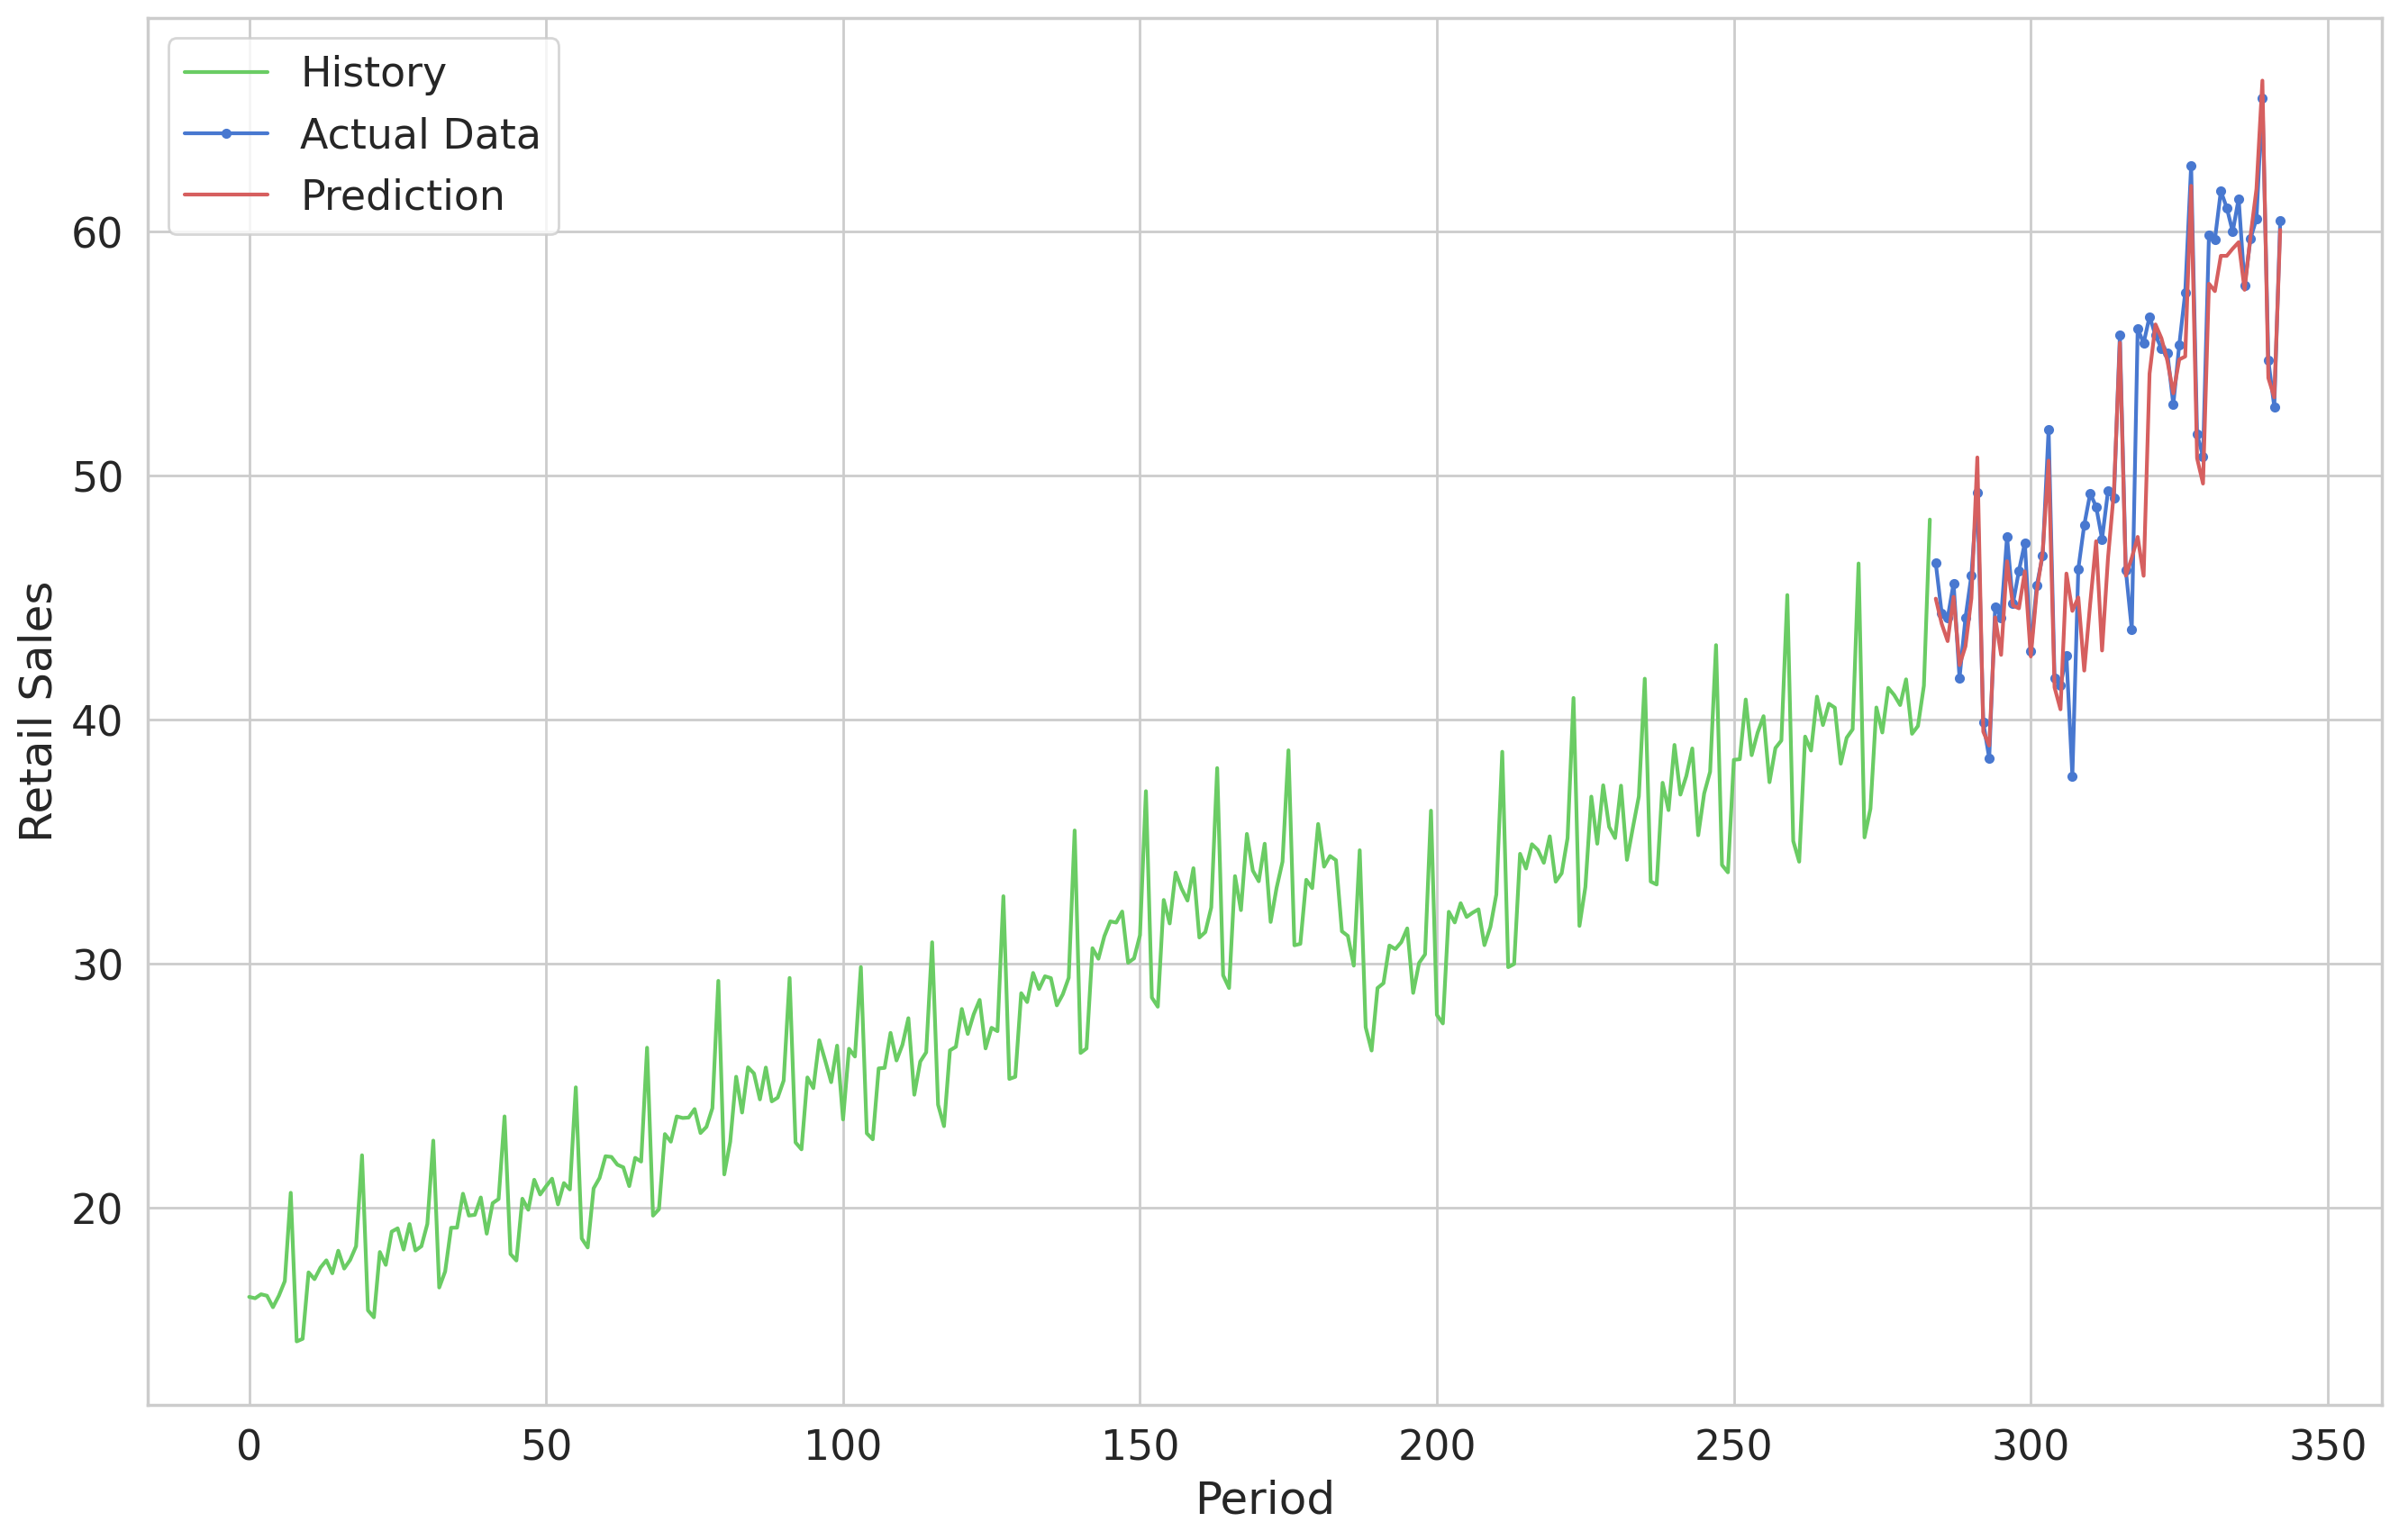

In [101]:
#plot model information for conv1d
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred2, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

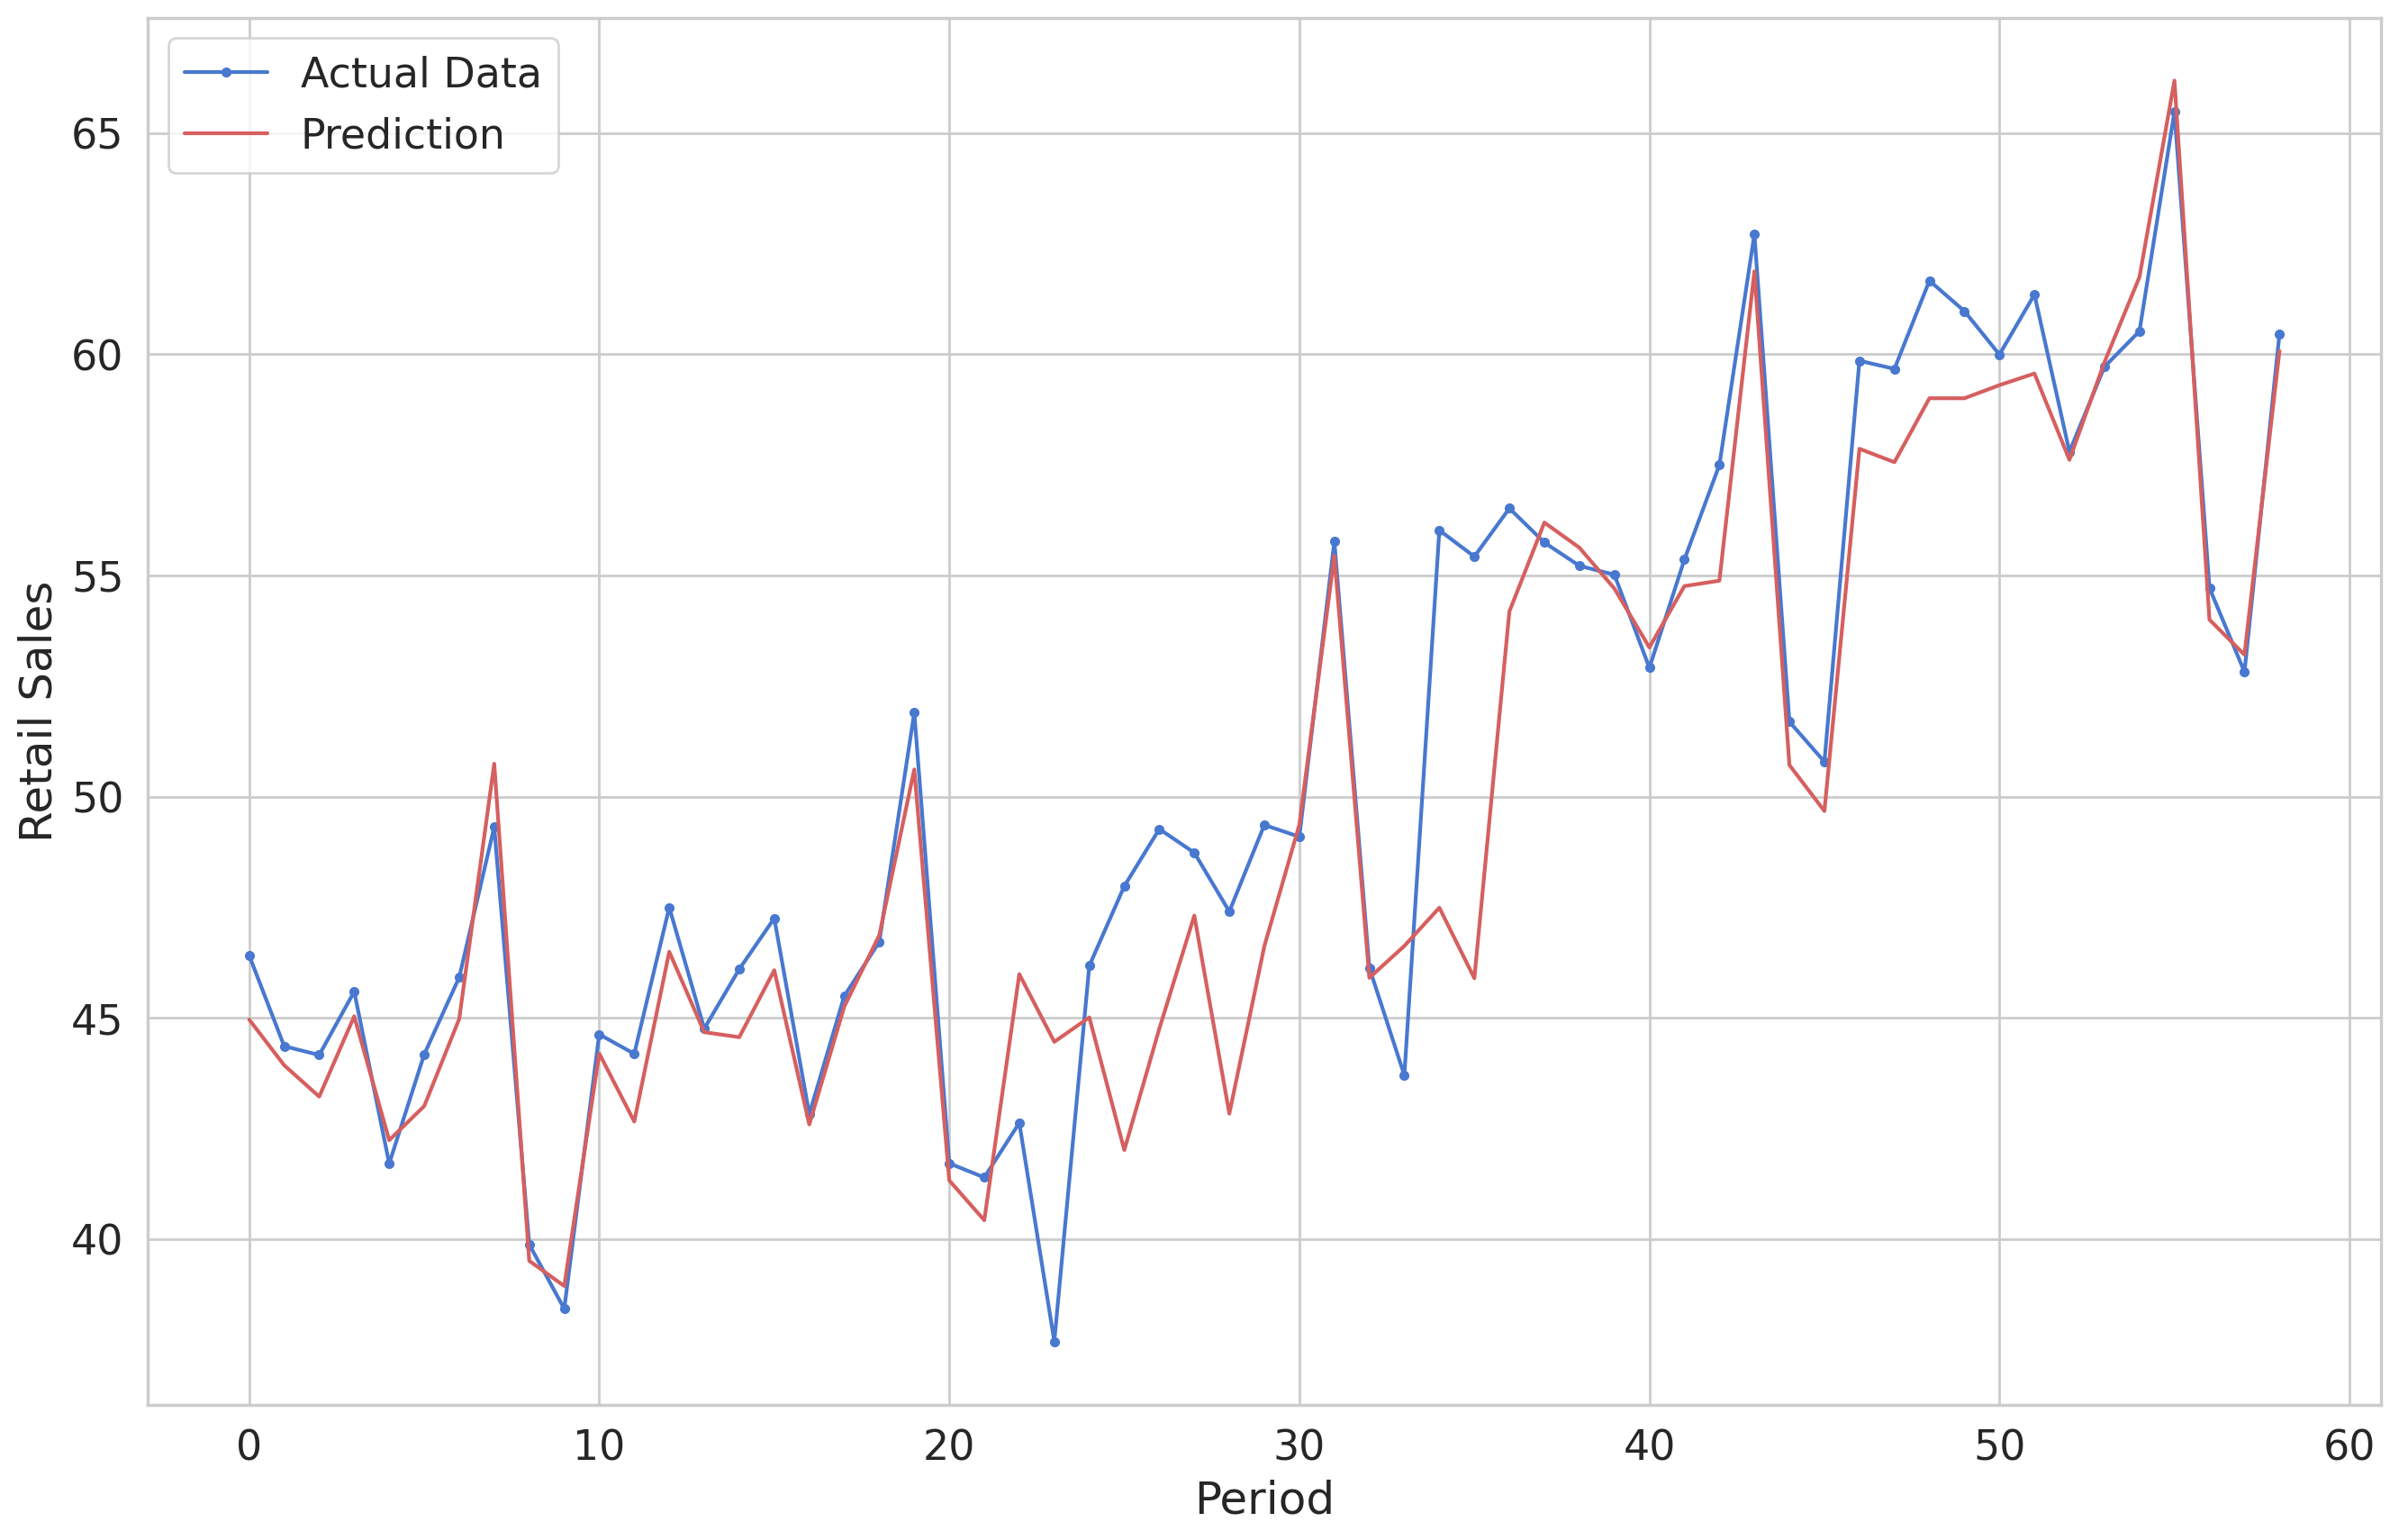

In [102]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred2, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

In [103]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))#MLP r2 score
print(r2_score(y_test,y_pred2))#Conv1d r2score


0.8420016013710676
0.8684690981028858



# Explanations


**PS1.C** I kept the adam optimzer since it seemed to work best with MSE. MSE was the best choice in loss since we are predicting values, rather than classifying any classes. 

**PS1.D** Both models compare extremely simular to eachother (probably considering that both were set up almost exactly the same only one uses Conv1d). Both were meant for time series data so it make sense that there would only be a sleight difference. The slieght bump in performace for the 1d CNN comes from the fact that it converges faster and thus can achieve better optimization